## Ecological index analysis with R 

## Install and load libraries

In [12]:
#source('http://bioconductor.org/biocLite.R')
#biocLite('phyloseq')

In [9]:
#install.packages("vegan")
#install.packages("ggplot2")

In [10]:
library(phyloseq)
library (vegan)
library(ggplot2)

ERROR: Error in library(phyloseq): there is no package called ‘phyloseq’


## Loading objects into Phyloseq

In [3]:
sp_otu<- as.matrix(read.table("../data/species.tab", header=T, row.names=1))
spOTU=otu_table(sp_otu, taxa_are_rows=T)
mats1=phyloseq(spOTU)

ERROR: Error in eval(expr, envir, enclos): no se pudo encontrar la función "otu_table"


## Loading metadata 

In [2]:
metadata=read.table("../data/sample_data.txt", header=T)
c("1","1","1","2","2","2","3","3","3","4","4","4")->wl_order
cbind(wl_order,metadata)->metadata
data.frame(Sample_ID=metadata$sample_ID, Site=metadata$site, Year=metadata$year, Period=metadata$samp_period, Water_level=metadata$water_level, Season=metadata$season_year, wl_order=metadata$wl_order, Temperature=metadata$temp,Conductivity=metadata$sp_comd, Sal=metadata$salt, pH=metadata$pH, row.names=sample_names((mats1)))-> o1
sampledata= sample_data(o1)
sampledata

Warning message in file(file, "rt"):
“no fue posible abrir el archivo '../data/sample_data.txt': No existe el archivo o el directorio”

ERROR: Error in file(file, "rt"): no se puede abrir la conexión


In [4]:
mats1=phyloseq(spOTU, sampledata)
mats1

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 3348 taxa and 12 samples ]
sample_data() Sample Data:       [ 12 samples by 11 sample variables ]

### Alpha diversity

#### DIversity index sps level

In [8]:
estimate_richness(mats1)->div_alpha
as.data.frame(t(sp_otu))->sp1
Pielou<-vegan::diversity(sp1)/log(specnumber(sp1))
cbind (div_alpha,Pielou)->div_alpha
write.table(div_alpha, "diversidad_species.txt", sep="\t")
cbind (div_alpha,Pielou,metadata)->div_alpha
div_alpha


,Observed,Chao1,se.chao1,ACE,se.ACE,Shannon,Simpson,InvSimpson,Fisher,Pielou,⋯,year,samp_period,water_level,temp,sp_comd,salt,pH,season_year,wl_order,season
S1,1224,1336.227,22.53791,1332.3193,18.15853,5.832583,0.9890016,90.92247,269.6479,0.8203490,⋯,y2012,nov,none,NA,NA,NA,NA,Autumn_12,1,Autumn
S2,848,1090.169,45.96885,999.2216,15.24557,5.369718,0.9879127,82.73145,199.0802,0.7963538,⋯,y2012,nov,none,NA,NA,NA,NA,Autumn_12,1,Autumn
S3,1590,1783.383,34.01591,1721.9230,20.61965,5.744567,0.9821076,55.88973,323.3813,0.7792954,⋯,y2012,nov,none,NA,NA,NA,NA,Autumn_12,1,Autumn
S4,1620,1829.012,40.57591,1719.3541,20.52189,6.098884,0.9911810,113.39091,334.9970,0.8252685,⋯,y2013,may,low,20.00,8.360,4.70,8.60,Spring_13,2,Spring
S5,1415,1586.079,31.93491,1527.7940,19.35561,5.665133,0.9846372,65.09222,293.5952,0.7808715,⋯,y2013,may,low,20.50,8.300,4.69,8.61,Spring_13,2,Spring
S6,1110,1317.101,38.53942,1252.9808,17.56643,5.626281,0.9848534,66.02130,248.5704,0.8023657,⋯,y2013,may,low,20.30,8.300,4.71,8.59,Spring_13,2,Spring
S7,1523,1702.168,32.71061,1645.6796,20.18635,5.900766,0.9888596,89.76349,322.4086,0.8051875,⋯,y2013,oct,high,26.50,6.530,3.66,7.90,Autumn_13,3,Autumn
S8,1436,1548.674,22.56204,1530.8533,19.42504,5.546792,0.9749436,39.91000,293.1319,0.7630103,⋯,y2013,oct,high,26.16,6.400,3.56,8.06,Autumn_13,3,Autumn
S9,1374,1565.100,36.07980,1492.9430,19.13103,5.774995,0.9842971,63.68237,291.8298,0.7992540,⋯,y2013,oct,high,25.42,6.478,3.59,8.07,Autumn_13,3,Autumn
S10,1266,1435.112,33.88343,1361.8773,18.20948,5.690773,0.9837418,61.50752,273.9717,0.7966234,⋯,y2014,may,medium,24.99,11.590,6.62,8.09,Spring_14,4,Spring


In [9]:
library(ggplot2)
div_alpha$season_year <- factor(div_alpha$season_year, levels = div_alpha$season_year[order(div_alpha$wl_order)])
div_alpha$season_year


Warning message in `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, :
“duplicated levels in factors are deprecated”

[1] Autumn_12 Autumn_12 Autumn_12 Spring_13 Spring_13 Spring_13 Autumn_13
 [8] Autumn_13 Autumn_13 Spring_14 Spring_14 Spring_14
12 Levels: Autumn_12 Autumn_12 Autumn_12 Spring_13 Spring_13 ... Spring_14

## Plot

In [10]:
ggplot(div_alpha, aes(x=season_year, y=Shannon, group=site))+geom_point(aes(x=season_year, y=Shannon, color=site), size=4, alpha=0.7) +
  geom_line(aes( color=site))+xlab("") + ggtitle("Species level")+ theme (legend.position = "none",plot.title = element_text(hjust = 0.5), axis.text.x = element_text(angle=45, hjust = 1))+ ylim (3.5,6.5)->p1
ggplot(div_alpha, aes(x=season_year, y=Pielou, group=site))+geom_point(aes(x=season_year, y=Pielou, color=site), size=4, alpha=0.7) +
  geom_line(aes( color=site))+xlab("")+ theme (legend.position = "none",plot.title = element_text(hjust = 0.5), axis.text.x = element_text(angle=45, hjust = 1))+ ylim (0.6,0.85)->p2

Warning message in `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, :
“duplicated levels in factors are deprecated”Warning message in `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, :
“duplicated levels in factors are deprecated”

Warning message in `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, :
“duplicated levels in factors are deprecated”Warning message in `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, :
“duplicated levels in factors are deprecated”

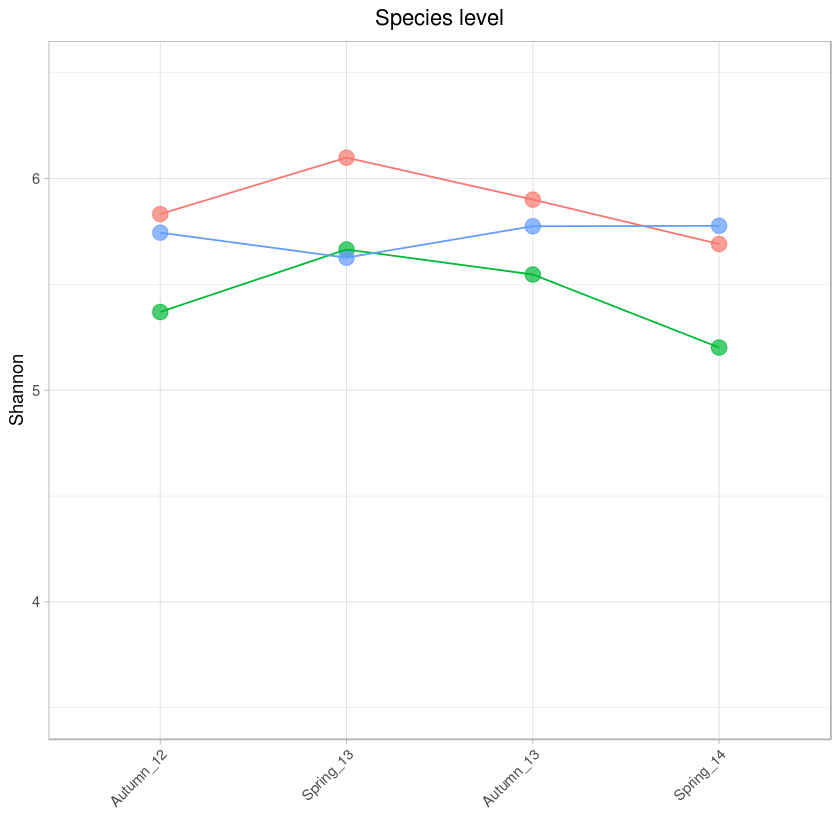

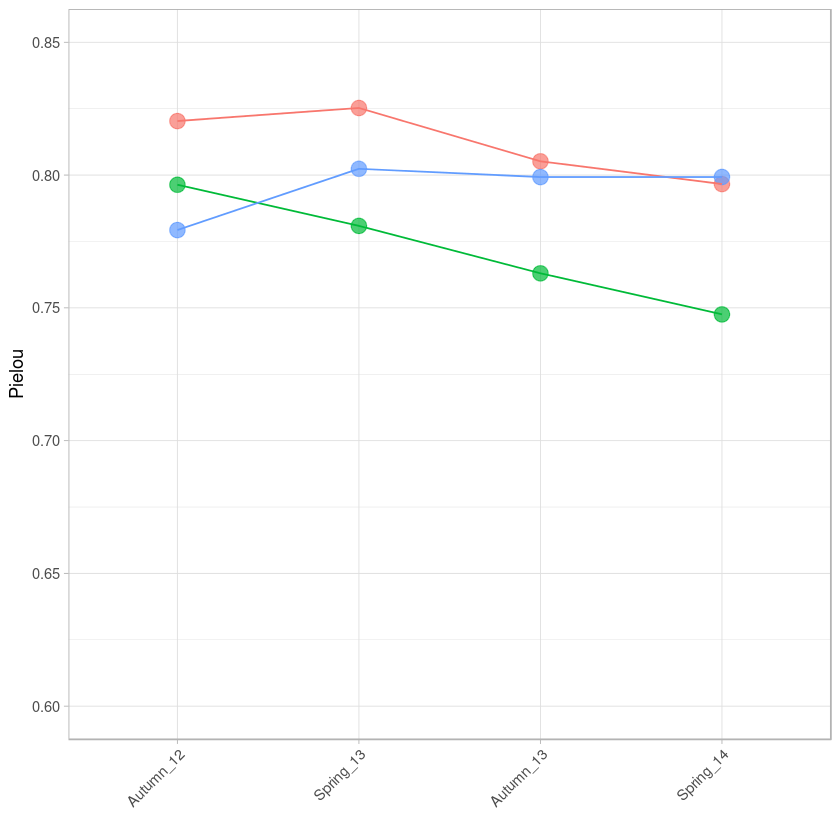

In [11]:
theme_set(theme_light())
p1
p2


## Genera level

In [24]:
gen_otu<- as.matrix(read.table("genus.tab", header=T, row.names=1))
genOTU=otu_table(gen_otu, taxa_are_rows=T)
mats2=phyloseq(genOTU)
mats2=phyloseq(genOTU, sampledata)
estimate_richness(mats2)->div_alpha2
as.data.frame(t(gen_otu))->gen1
Pielou2<-vegan::diversity(gen1)/log(specnumber(gen1))
cbind (div_alpha2,Pielou2)->div_alpha2
write.table(div_alpha2, "diversidad_genus.txt", sep="\t")
cbind (div_alpha2,Pielou2, metadata)->div_alpha2
div_alpha2

,Observed,Chao1,se.chao1,ACE,se.ACE,Shannon,Simpson,InvSimpson,Fisher,Pielou2,⋯,year,samp_period,water_level,temp,sp_comd,salt,pH,season_year,wl_order,season
S1,791,893.3529,22.24987,907.2252,15.07986,5.182797,0.9848085,65.82615,155.5618,0.7766470,⋯,y2012,nov,none,NA,NA,NA,NA,Autumn_12,1,Autumn
S2,595,797.3239,41.70870,749.0884,13.54643,4.560236,0.9732375,37.36565,126.3525,0.7138126,⋯,y2012,nov,none,NA,NA,NA,NA,Autumn_12,1,Autumn
S3,909,1082.7879,33.59760,1071.0955,16.51527,4.933919,0.9762544,42.11305,162.2370,0.7242615,⋯,y2012,nov,none,NA,NA,NA,NA,Autumn_12,1,Autumn
S4,904,1078.6901,37.09365,1027.8185,16.05490,5.234497,0.9861490,72.19675,162.7804,0.7690066,⋯,y2013,may,low,20.00,8.360,4.70,8.60,Spring_13,2,Spring
S5,886,1053.0000,34.21966,1014.5400,15.83336,5.043441,0.9805729,51.47443,164.1531,0.7431341,⋯,y2013,may,low,20.50,8.300,4.69,8.61,Spring_13,2,Spring
S6,788,988.6800,40.76315,940.0626,15.41020,5.145337,0.9823072,56.52022,160.9427,0.7714729,⋯,y2013,may,low,20.30,8.300,4.71,8.59,Spring_13,2,Spring
S7,957,1103.3505,29.57780,1088.5515,16.52654,5.232292,0.9844902,64.47528,180.5817,0.7623021,⋯,y2013,oct,high,26.50,6.530,3.66,7.90,Autumn_13,3,Autumn
S8,903,998.4130,21.66008,993.0575,15.65848,4.951102,0.9713006,34.84397,165.0920,0.7274910,⋯,y2013,oct,high,26.16,6.400,3.56,8.06,Autumn_13,3,Autumn
S9,906,1087.8354,37.11671,1038.1193,15.94765,5.197987,0.9810412,52.74587,173.3913,0.7633951,⋯,y2013,oct,high,25.42,6.478,3.59,8.07,Autumn_13,3,Autumn
S10,834,1002.7647,36.55029,942.0853,15.16222,5.159896,0.9815375,54.16386,162.2279,0.7671301,⋯,y2014,may,medium,24.99,11.590,6.62,8.09,Spring_14,4,Spring


In [25]:
div_alpha2$season_year <- factor(div_alpha2$season_year, levels = div_alpha2$season_year[order(div_alpha2$wl_order)])
div_alpha2$season_year

Warning message in `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, :
“duplicated levels in factors are deprecated”

[1] Autumn_12 Autumn_12 Autumn_12 Spring_13 Spring_13 Spring_13 Autumn_13
 [8] Autumn_13 Autumn_13 Spring_14 Spring_14 Spring_14
12 Levels: Autumn_12 Autumn_12 Autumn_12 Spring_13 Spring_13 ... Spring_14

In [26]:
ggplot(div_alpha2, aes(x=season_year, y=Shannon, group=site))+geom_point(aes(x=season_year, y=Shannon, color=site), size=4, alpha=0.7) +
  geom_line(aes( color=site))+xlab("")+ ylab("")+ ggtitle("Genus level")+ theme (legend.position = "none",plot.title = element_text(hjust = 0.5), axis.text.x = element_text(angle=45, hjust = 1))+ ylim (3.5,6.5)->p3
ggplot(div_alpha2, aes(x=season_year, y=Pielou2, group=site))+geom_point(aes(x=season_year, y=Pielou2, color=site), size=4, alpha=0.7) +
  geom_line(aes( color=site))+ylab("")+ theme (legend.position = "none",plot.title = element_text(hjust = 0.5), axis.text.x = element_text(angle=45, hjust = 1))+ ylim (0.6,0.85)->p4

## Family level

In [27]:
fam_otu<- as.matrix(read.table("family.tab", header=T, row.names=1))
famOTU=otu_table(fam_otu, taxa_are_rows=T)
mats3=phyloseq(famOTU)
mats3=phyloseq(famOTU, sampledata)
estimate_richness(mats3)->div_alpha3
as.data.frame(t(fam_otu))->fam1
Pielou3<-vegan::diversity(fam1)/log(specnumber(fam1))
cbind (div_alpha3,Pielou3)->div_alpha3
write.table(div_alpha3, "diversidad_family.txt", sep="\t")
cbind (div_alpha3,Pielou3, metadata)->div_alpha3
div_alpha3

,Observed,Chao1,se.chao1,ACE,se.ACE,Shannon,Simpson,InvSimpson,Fisher,Pielou3,⋯,year,samp_period,water_level,temp,sp_comd,salt,pH,season_year,wl_order,season
S1,320,366.2432,15.80995,372.0518,9.622339,3.981346,0.9442797,17.94677,51.77295,0.6902088,⋯,y2012,nov,none,NA,NA,NA,NA,Autumn_12,1,Autumn
S2,261,338.2941,24.07770,338.5277,9.597607,3.577315,0.9376253,16.03215,45.61203,0.6428793,⋯,y2012,nov,none,NA,NA,NA,NA,Autumn_12,1,Autumn
S3,354,402.8250,16.14716,406.0271,10.056344,3.574358,0.9175810,12.13312,52.63008,0.6089925,⋯,y2012,nov,none,NA,NA,NA,NA,Autumn_12,1,Autumn
S4,356,447.2857,29.11551,430.9873,10.520159,3.942499,0.9421883,17.29754,53.41120,0.6710716,⋯,y2013,may,low,20.00,8.360,4.70,8.60,Spring_13,2,Spring
S5,359,422.0303,20.68978,411.6562,10.091779,3.879975,0.9451043,18.21637,55.39525,0.6594871,⋯,y2013,may,low,20.50,8.300,4.69,8.61,Spring_13,2,Spring
S6,342,417.3030,23.78973,412.7483,10.317039,4.230465,0.9688011,32.05243,57.81817,0.7250389,⋯,y2013,may,low,20.30,8.300,4.71,8.59,Spring_13,2,Spring
S7,377,415.9268,13.53593,423.5784,10.246550,4.264114,0.9702822,33.64984,58.72792,0.7188027,⋯,y2013,oct,high,26.50,6.530,3.66,7.90,Autumn_13,3,Autumn
S8,363,410.2222,17.46850,404.0358,9.839101,3.968018,0.9407215,16.86953,55.33574,0.6731841,⋯,y2013,oct,high,26.16,6.400,3.56,8.06,Autumn_13,3,Autumn
S9,373,444.1875,22.95958,435.9638,10.234683,4.228663,0.9664094,29.77024,59.24938,0.7141107,⋯,y2013,oct,high,25.42,6.478,3.59,8.07,Autumn_13,3,Autumn
S10,347,443.1304,32.25633,407.7630,9.998838,4.235778,0.9693478,32.62405,55.95374,0.7241482,⋯,y2014,may,medium,24.99,11.590,6.62,8.09,Spring_14,4,Spring


In [28]:
div_alpha3$season_year <- factor(div_alpha3$season_year, levels = div_alpha3$season_year[order(div_alpha3$wl_order)])
div_alpha3$season_year

Warning message in `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, :
“duplicated levels in factors are deprecated”

[1] Autumn_12 Autumn_12 Autumn_12 Spring_13 Spring_13 Spring_13 Autumn_13
 [8] Autumn_13 Autumn_13 Spring_14 Spring_14 Spring_14
12 Levels: Autumn_12 Autumn_12 Autumn_12 Spring_13 Spring_13 ... Spring_14

In [29]:
theme_set(theme_light())

In [30]:
ggplot(div_alpha3, aes(x=season_year, y=Shannon, group=site))+geom_point(aes(x=season_year, y=Shannon, color=site), size=4, alpha=0.7) +
  geom_line(aes( color=site))+ xlab("")+ ylab("")+ ggtitle("Family level")+ theme (legend.position = "none",plot.title = element_text(hjust = 0.5), axis.text.x = element_text(angle=45, hjust = 1))+ ylim (3.5, 6.5)->p5
ggplot(div_alpha3, aes(x=season_year, y=Pielou3, group=site))+geom_point(aes(x=season_year, y=Pielou3, color=site), size=4, alpha=0.7) +
  geom_line(aes( color=site)) + xlab("")+ ylab("")+  theme (legend.position = "none",plot.title = element_text(hjust = 0.5), axis.text.x = element_text(angle=45, hjust = 1))+ ylim (0.6,0.85)->p6

Warning message in `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, :
“duplicated levels in factors are deprecated”Warning message in `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, :
“duplicated levels in factors are deprecated”Warning message in `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, :
“duplicated levels in factors are deprecated”Warning message in `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, :
“duplicated levels in factors are deprecated”Warning message in `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, :
“duplicated levels in factors are deprecated”Warning message in `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, :
“duplicated levels in factors are deprecated”Warning message in `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, :
“d

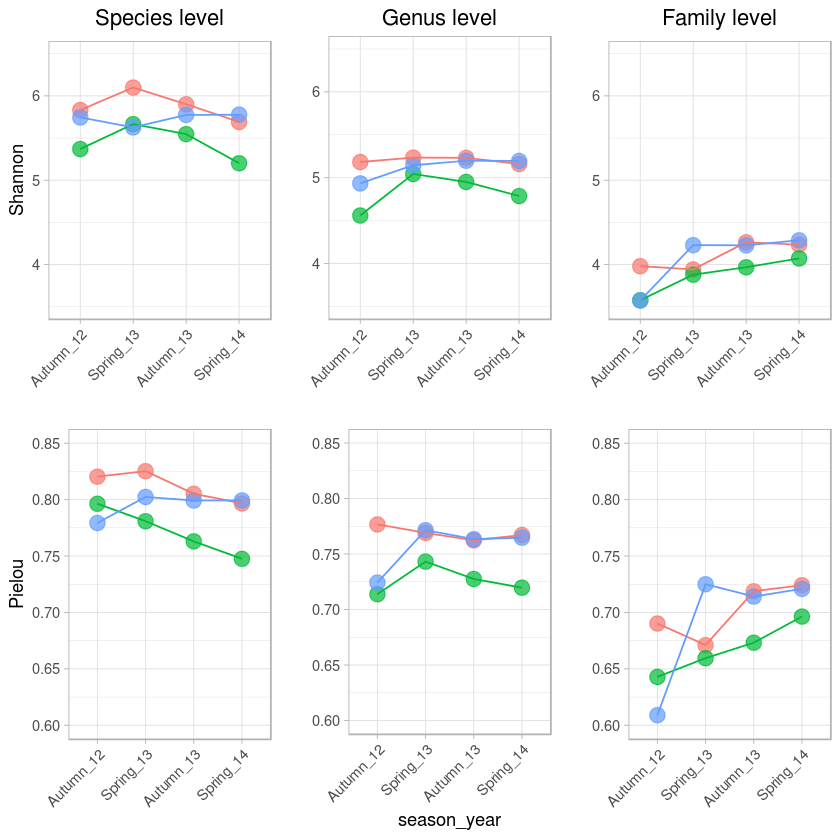

In [31]:
multiplot(p1,p2,p3,p4,p5,p6, cols=3)

In [32]:
pdf("alpha_div_tax_levels.pdf", width=18, height=12)
multiplot(p1,p2,p3,p4,p5,p6, cols=3)
dev.off()


Warning message in `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, :
“duplicated levels in factors are deprecated”Warning message in `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, :
“duplicated levels in factors are deprecated”Warning message in `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, :
“duplicated levels in factors are deprecated”Warning message in `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, :
“duplicated levels in factors are deprecated”Warning message in `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, :
“duplicated levels in factors are deprecated”Warning message in `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, :
“duplicated levels in factors are deprecated”Warning message in `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, :
“d

png 
  2

# Functional diversity pfam

In [20]:
pfam_tab<- as.matrix(read.table("../data/mats_abundances.sort.tab", header=T, row.names=1))
pfamOTU=otu_table(pfam_tab, taxa_are_rows=T)
pfam=phyloseq(pfamOTU)
metadata=read.table("sample_data.txt", header=T)
c("1","1","1","2","2","2","3","3","3","4","4","4")->wl_order
cbind(wl_order,metadata)->metadata
data.frame(Sample_ID=metadata$sample_ID, Site=metadata$site, Year=metadata$year, Period=metadata$samp_period, Water_level=metadata$water_level, Season=metadata$season, wl_order=metadata$wl_order, Temperature=metadata$temp,Conductivity=metadata$sp_comd, Sal=metadata$salt, pH=metadata$pH, row.names=sample_names((pfam)))-> o2
sampledata= sample_data(o2)

pfam=phyloseq(pfamOTU, sampledata)
pfam

estimate_richness(pfam)->div_alpha_p
as.data.frame(t(pfam_tab))->sp2
Pielou<-vegan::diversity(sp2)/log(specnumber(sp2))
cbind (div_alpha_p,Pielou, metadata)->div_alpha_p
div_alpha_p
write.table(div_alpha_p, "diversidad_pfam.txt", sep="\t")

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 10124 taxa and 12 samples ]
sample_data() Sample Data:       [ 12 samples by 11 sample variables ]

,Observed,Chao1,se.chao1,ACE,se.ACE,Shannon,Simpson,InvSimpson,Fisher,Pielou,⋯,year,samp_period,water_level,temp,sp_comd,salt,pH,season_year,wl_order,season
S1,6629,7916.856,92.49518,7786.558,44.12164,7.554437,0.9987244,783.9485,1332.195,0.8585359,⋯,y2012,nov,none,NA,NA,NA,NA,Autumn_12,1,Autumn
S2,5167,6108.427,77.14891,5951.651,38.07480,7.564737,0.9988252,851.2295,1194.940,0.8847597,⋯,y2012,nov,none,NA,NA,NA,NA,Autumn_12,1,Autumn
S3,6162,7151.772,80.13313,7034.084,41.61839,7.536980,0.9987023,770.6060,1164.599,0.8637227,⋯,y2012,nov,none,NA,NA,NA,NA,Autumn_12,1,Autumn
S4,7090,8625.982,107.24925,8428.463,45.96354,7.568078,0.9987335,789.6073,1341.744,0.8535644,⋯,y2013,may,low,20.00,8.360,4.70,8.60,Spring_13,2,Spring
S5,6695,7978.183,94.12588,7803.488,44.01618,7.564408,0.9987472,798.1962,1296.143,0.8587023,⋯,y2013,may,low,20.50,8.300,4.69,8.61,Spring_13,2,Spring
S6,6123,7298.951,92.23206,7080.825,41.78794,7.485337,0.9986792,757.1067,1167.858,0.8584292,⋯,y2013,may,low,20.30,8.300,4.71,8.59,Spring_13,2,Spring
S7,7014,8649.187,114.58063,8350.412,45.63128,7.542102,0.9986914,764.1924,1315.046,0.8516699,⋯,y2013,oct,high,26.50,6.530,3.66,7.90,Autumn_13,3,Autumn
S8,6378,7532.949,92.09878,7286.888,42.15693,7.491470,0.9986547,743.3185,1146.695,0.8551311,⋯,y2013,oct,high,26.16,6.400,3.56,8.06,Autumn_13,3,Autumn
S9,6782,7972.291,89.60556,7793.669,43.75053,7.489023,0.9985754,701.9396,1241.477,0.8489004,⋯,y2013,oct,high,25.42,6.478,3.59,8.07,Autumn_13,3,Autumn
S10,6399,7538.322,86.32907,7425.114,42.94990,7.517991,0.9986962,767.0120,1234.050,0.8578366,⋯,y2014,may,medium,24.99,11.590,6.62,8.09,Spring_14,4,Spring


Warning message in `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, :
“duplicated levels in factors are deprecated”Warning message in `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, :
“duplicated levels in factors are deprecated”Warning message in `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, :
“duplicated levels in factors are deprecated”Warning message in `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, :
“duplicated levels in factors are deprecated”

png 
  2

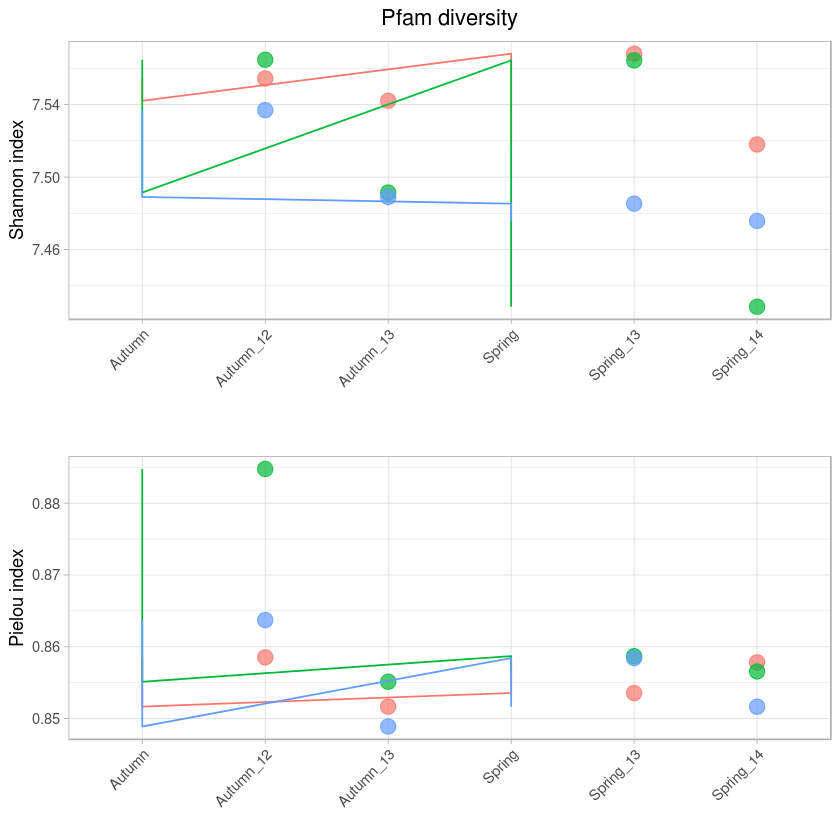

In [38]:
ggplot(div_alpha_p, aes(x=season, y=Pielou, group=site))+geom_point(aes(x=season_year, y=Pielou, color=site), size=4, alpha=0.7) +  geom_line(aes(color=site))+ ylab("Pielou index")+xlab("") + ggtitle("")+ theme (legend.position = "none",plot.title = element_text(hjust = 0.5), axis.text.x = element_text(angle=45, hjust = 1))->pfam_pielou
ggplot(div_alpha_p, aes(x=season, y=Shannon, group=site))+geom_point(aes(x=season_year, y=Shannon, color=site), size=4, alpha=0.7) +  geom_line(aes(color=site))+ ylab("Shannon index")+xlab("") + ggtitle("Pfam diversity")+ theme (legend.position = "none",plot.title = element_text(hjust = 0.5), axis.text.x = element_text(angle=45, hjust = 1))->pfam_shannon
multiplot (pfam_shannon, pfam_pielou, cols=1)
pdf("pfam_div.pdf",width=6, height=10)
multiplot (pfam_shannon, pfam_pielou, cols=1)
dev.off()

## Plot

In [22]:
theme_set(theme_light())
cbind (div_alpha_p, Pielou, metadata)->div_alpha_p
library(ggplot2)
div_alpha_p$season_year <- factor(div_alpha_p$season_year, levels = div_alpha_p$season_year[order(div_alpha_p$wl_order)])
div_alpha_p$season_year

Warning message in `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, :
“duplicated levels in factors are deprecated”

[1] Autumn_12 Autumn_12 Autumn_12 Spring_13 Spring_13 Spring_13 Autumn_13
 [8] Autumn_13 Autumn_13 Spring_14 Spring_14 Spring_14
12 Levels: Autumn_12 Autumn_12 Autumn_12 Spring_13 Spring_13 ... Spring_14

Warning message in `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, :
“duplicated levels in factors are deprecated”Warning message in `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, :
“duplicated levels in factors are deprecated”Warning message in `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, :
“duplicated levels in factors are deprecated”Warning message in `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, :
“duplicated levels in factors are deprecated”

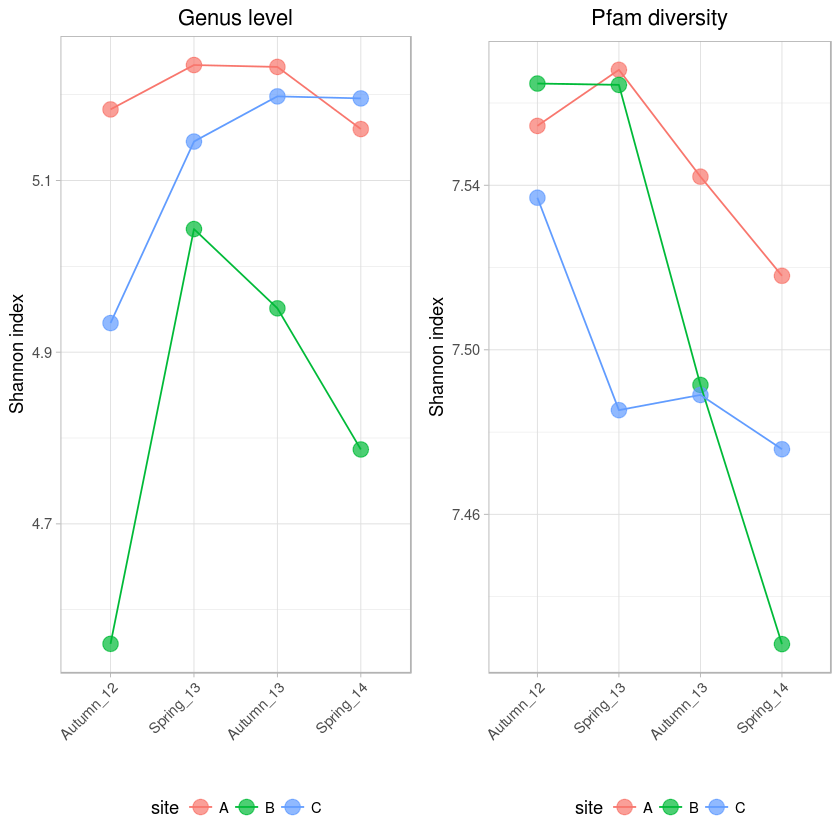

In [50]:
ggplot(div_alpha2, aes(x=season_year, y=Shannon, group=site))+geom_point(aes(x=season_year, y=Shannon, color=site), size=4, alpha=0.7) +
  geom_line(aes( color=site))+xlab("")+ ylab("Shannon index")+ ggtitle("Genus level")+ theme (legend.position = "bottom", plot.title = element_text(hjust = 0.5), axis.text.x = element_text(angle=45, hjust = 1))+ ylim (4.5,7.6)->gen_n
ggplot(div_alpha2, aes(x=season_year, y=Shannon, group=site))+geom_point(aes(x=season_year, y=Shannon, color=site), size=4, alpha=0.7) +
  geom_line(aes( color=site))+xlab("")+ ylab("Shannon index")+ ggtitle("Genus level")+ theme (legend.position = "bottom", plot.title = element_text(hjust = 0.5), axis.text.x = element_text(angle=45, hjust = 1))->gen_tax
ggplot(div_alpha_p, aes(x=season_year, y=Shannon, group=site))+geom_point(aes(x=season, y=Shannon, color=site), size=4, alpha=0.7) +
  geom_line(aes(color=site))+ ylab("Shannon index")+xlab("") + ggtitle("Pfam diversity")+ theme (legend.position = "bottom",plot.title = element_text(hjust = 0.5), axis.text.x = element_text(angle=45, hjust = 1))+ ylim (4.5,7.6)-> pfam_n

ggplot(div_alpha_p, aes(x=season_year, y=Shannon, group=site))+geom_point(aes(x=season, y=Shannon, color=site), size=4, alpha=0.7) +
  geom_line(aes(color=site))+ ylab("Shannon index")+xlab("") + ggtitle("Pfam diversity")+ theme (legend.position = "bottom",plot.title = element_text(hjust = 0.5), axis.text.x = element_text(angle=45, hjust = 1))-> pfam

multiplot (gen_tax, pfam, cols=2)


In [55]:
pdf("genus_pfam_alpha_div.pdf",width=12, height=5)
multiplot (gen_tax,pfam, cols=2)
dev.off()

Warning message in `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, :
“duplicated levels in factors are deprecated”Warning message in `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, :
“duplicated levels in factors are deprecated”Warning message in `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, :
“duplicated levels in factors are deprecated”Warning message in `levels<-`(`*tmp*`, value = if (nl == nL) as.character(labels) else paste0(labels, :
“duplicated levels in factors are deprecated”

png 
  2

### Rarefation curves

Generate accumulative curves using the genera level

In [33]:
head (gen_otu)

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12
Bacteria_unclassified,1438,479,1550,1925,1651,1652,1938,2156,2058,2401,2537,2551
Desulfatitalea,187,257,4791,59,3120,372,966,5216,267,499,2709,532
Proteobacteria_unclassified,1089,343,1418,1661,1320,1276,1591,1547,1519,1471,1283,2289
Rhodobacteraceae_unclassified,1315,713,2648,2241,1537,600,1044,1033,998,782,417,808
Nonspecific/Host,813,191,599,1031,1034,609,1293,749,2622,870,706,1137
Alphaproteobacteria_unclassified,938,360,1263,1479,919,737,1009,831,951,883,546,996


In [34]:
#acum 1 = sampling site  1 
#acum 2 =sampling site  1+2
#acum 3 = sampling site  1+2+3
#acum 4= sampling site  1+2+3+4

#Site A 
Acum_1_A<-(gen_otu[,1])
Acum_2_A<-rowSums(gen_otu[,c(1,4)])
Acum_3_A<-rowSums(gen_otu[,c(1,4,7)])
Acum_4_A<-rowSums(gen_otu[,c(1,4,7,10)])

cbind(Acum_1_A, Acum_2_A, Acum_3_A, Acum_4_A)->acumulativa.A

head (acumulativa.A)

,Acum_1_A,Acum_2_A,Acum_3_A,Acum_4_A
Bacteria_unclassified,1438,3363,5301,7702
Desulfatitalea,187,246,1212,1711
Proteobacteria_unclassified,1089,2750,4341,5812
Rhodobacteraceae_unclassified,1315,3556,4600,5382
Nonspecific/Host,813,1844,3137,4007
Alphaproteobacteria_unclassified,938,2417,3426,4309


In [13]:
#Site B
Acum_1_B<-(gen_otu[,2])
Acum_2_B<-rowSums(gen_otu[,c(2,5)])
Acum_3_B<-rowSums(gen_otu[,c(2,5,8)])
Acum_4_B<-rowSums(gen_otu[,c(2,5,8,11)])

cbind(Acum_1_B, Acum_2_B, Acum_3_B, Acum_4_B)->acumulativa.B

Acum_1_C<-(gen_otu[,3])
Acum_2_C<-rowSums(gen_otu[,c(3,6)])
Acum_3_C<-rowSums(gen_otu[,c(3,6,9)])
Acum_4_C<-rowSums(gen_otu[,c(3,6,9,12)])

cbind(Acum_1_C, Acum_2_C, Acum_3_C, Acum_4_C)->acumulativa.C

ERROR: Error in eval(expr, envir, enclos): objeto 'gen_otu' no encontrado


Hacer rarefacción y graficar

In [36]:
#Plot grafica 
#Genera un pdf con todas las curvas 
pdf("curvas.rarefacción.pdf")
rarecurve(t(acumulativa.A), main="Richness at genus level Site A",leyend=T, ylab="Genera", col=c("cornflowerblue","lightcoral","orange","slateblue"))
legend("right", legend=c("acum1 = NOV12", "acum2=+MAY13","acum3=+OCT13","acum4=+MAY14"),fill=c("cornflowerblue","lightcoral","orange","slateblue"),title="Season", 
       cex= .7, title.adj=0.3, bty="0")
rarecurve(t(acumulativa.B), main="Rarefaction curve at genus level Site B",leyend=T, ylab="Genera", col=c("cornflowerblue","lightcoral","orange","slateblue"))
legend("right", legend=c("acum1 = NOV12", "acum2=+MAY13","acum3=+OCT13","acum4=+MAY14"),fill=c("cornflowerblue","lightcoral","orange","slateblue"),title="Season", 
       cex= .7, title.adj=0.3, bty="0")
rarecurve(t(acumulativa.C), main="Rarefaction curve at genus level Site C",leyend=T, ylab="Genera", col=c("cornflowerblue","lightcoral","orange","slateblue"))
legend("right", legend=c("acum1 = NOV12", "acum2=+MAY13","acum3=+OCT13","acum4=+MAY14"),fill=c("cornflowerblue","lightcoral","orange","slateblue"),title="Season", 
       cex= .7, title.adj=0.3, bty="0")
dev.off()



Warning message in plot.window(...):
“"leyend" is not a graphical parameter”Warning message in plot.xy(xy, type, ...):
“"leyend" is not a graphical parameter”Warning message in axis(side = side, at = at, labels = labels, ...):
“"leyend" is not a graphical parameter”Warning message in axis(side = side, at = at, labels = labels, ...):
“"leyend" is not a graphical parameter”Warning message in box(...):
“"leyend" is not a graphical parameter”Warning message in title(...):
“"leyend" is not a graphical parameter”Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"leyend" is not a graphical parameter”Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"leyend" is not a graphical parameter”Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"leyend" is not a graphical parameter”Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"leyend" is not a graphical parameter”Warning message in strwidth("m", cex = cex, ...):
“"leyend" is not a graphical p

png 
  2

In [37]:
tiff("rarefaction.tiff")
rarecurve(t(acumulativa.A), main="Richness at genus level Site A",leyend=T, ylab="Genera", col=c("cornflowerblue","lightcoral","orange","slateblue"))
legend("right", legend=c("acum1 = NOV12", "acum2=+MAY13","acum3=+OCT13","acum4=+MAY14"),fill=c("cornflowerblue","lightcoral","orange","slateblue"),title="Season", 
       cex= .7, title.adj=0.3, bty="0")
rarecurve(t(acumulativa.B), main="Rarefaction curve at genus level Site B",leyend=T, ylab="Genera", col=c("cornflowerblue","lightcoral","orange","slateblue"))
legend("right", legend=c("acum1 = NOV12", "acum2=+MAY13","acum3=+OCT13","acum4=+MAY14"),fill=c("cornflowerblue","lightcoral","orange","slateblue"),title="Season", 
       cex= .7, title.adj=0.3, bty="0")
rarecurve(t(acumulativa.C), main="Rarefaction curve at genus level Site C",leyend=T, ylab="Genera", col=c("cornflowerblue","lightcoral","orange","slateblue"))
legend("right", legend=c("acum1 = NOV12", "acum2=+MAY13","acum3=+OCT13","acum4=+MAY14"),fill=c("cornflowerblue","lightcoral","orange","slateblue"),title="Season", 
       cex= .7, title.adj=0.3, bty="0")
dev.off()


Warning message in plot.window(...):
“"leyend" is not a graphical parameter”Warning message in plot.xy(xy, type, ...):
“"leyend" is not a graphical parameter”Warning message in axis(side = side, at = at, labels = labels, ...):
“"leyend" is not a graphical parameter”Warning message in axis(side = side, at = at, labels = labels, ...):
“"leyend" is not a graphical parameter”Warning message in box(...):
“"leyend" is not a graphical parameter”Warning message in title(...):
“"leyend" is not a graphical parameter”Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"leyend" is not a graphical parameter”Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"leyend" is not a graphical parameter”Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"leyend" is not a graphical parameter”Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"leyend" is not a graphical parameter”Warning message in strwidth("m", cex = cex, ...):
“"leyend" is not a graphical p

png 
  2

### Clustering analysis


tranformando los datos a abundancias relativas

## Community taxonomic composition

In [25]:
mats1_rel <- transform_sample_counts(mats1, function(x) x / sum(x) * 100)
mats2_rel <- transform_sample_counts(mats2, function(x) x / sum(x) * 100)
mats3_rel <- transform_sample_counts(mats3, function(x) x / sum(x) * 100)

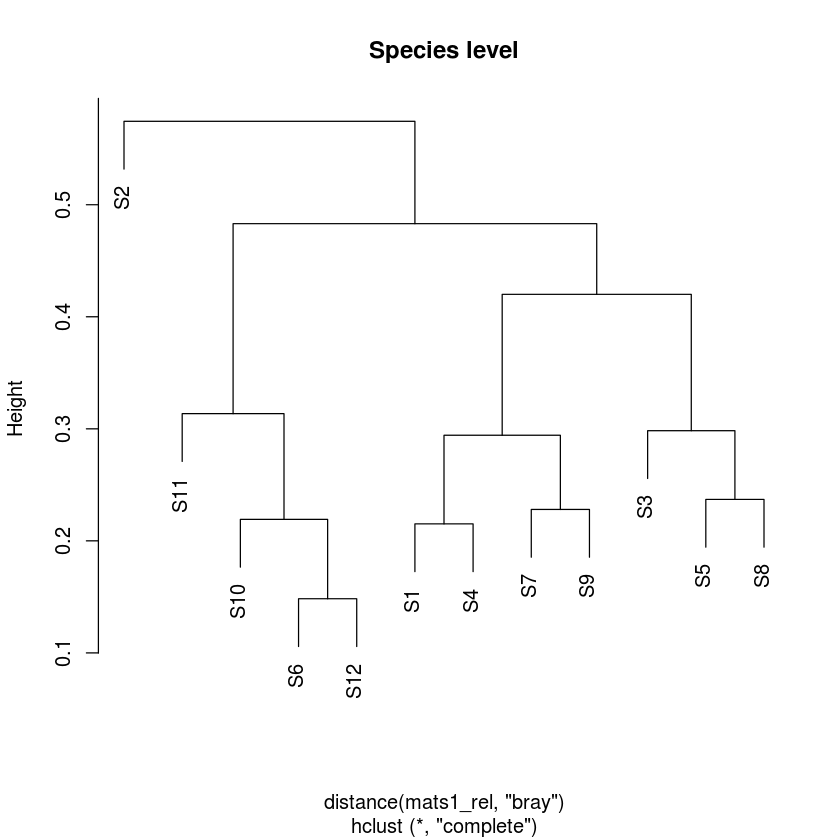

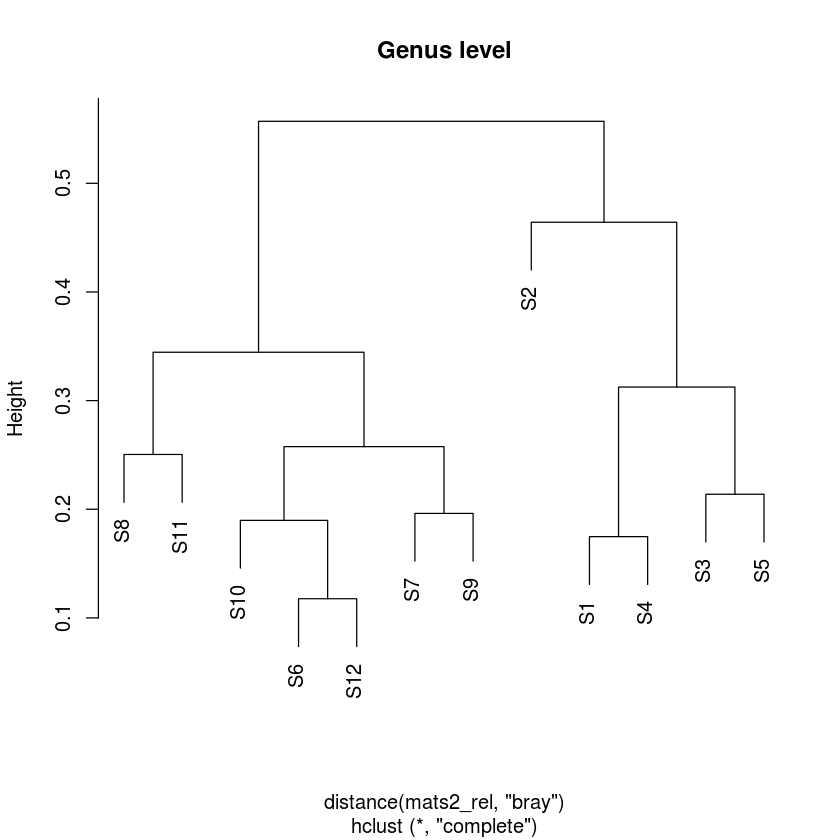

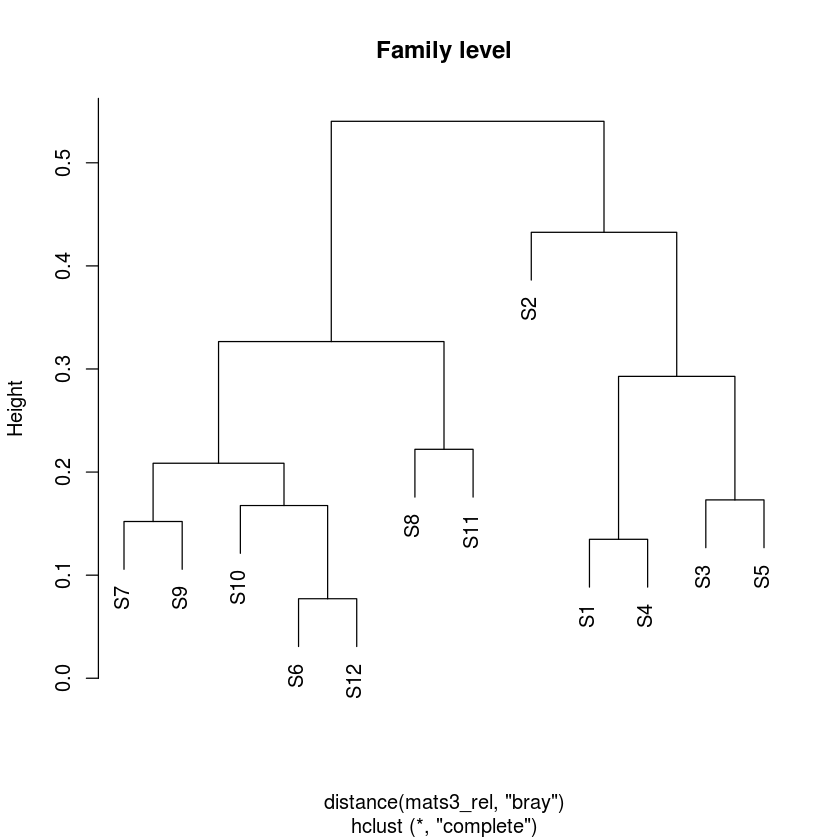

In [26]:
plot(hclust(distance(mats1_rel,"bray")),main = "Species level")
plot(hclust(distance(mats2_rel,"bray")),main = "Genus level")
plot(hclust(distance(mats3_rel,"bray")),main = "Family level")

In [39]:
pdf("bray-curts_dendo_pfam.pdf")
plot(hclust(distance(mats1_rel,"bray")),main = "Species level")
plot(hclust(distance(mats2_rel,"bray")),main = "Genus level")
plot(hclust(distance(mats3_rel,"bray")),main = "Family level")
dev.off()

ERROR: Error in distance(mats1_rel, "bray"): object 'mats1_rel' not found


## Community metabolic composition 

In [ ]:
pfam_rel <- transform_sample_counts(pfam, function(x) x / sum(x) * 100)
plot(hclust(distance(pfam,"bray")),main = "Pfam")
plot(hclust(distance(pfam_rel,"bray")),main = "Pfam2")

pdf("bray-curts_pfam.pdf")
    
plot(hclust(distance(pfam,"bray")),main = "Pfam")
plot(hclust(distance(pfam_rel,"bray")),main = "Pfam2")
    
dev.off()


multiplot function


In [23]:
# Multiple plot function
#
# ggplot objects can be passed in ..., or to plotlist (as a list of ggplot objects)
# - cols:   Number of columns in layout
# - layout: A matrix specifying the layout. If present, 'cols' is ignored.
#
# If the layout is something like matrix(c(1,2,3,3), nrow=2, byrow=TRUE),
# then plot 1 will go in the upper left, 2 will go in the upper right, and
# 3 will go all the way across the bottom.
#
multiplot <- function(..., plotlist=NULL, file, cols=1, layout=NULL) {
  library(grid)

  # Make a list from the ... arguments and plotlist
  plots <- c(list(...), plotlist)

  numPlots = length(plots)

  # If layout is NULL, then use 'cols' to determine layout
  if (is.null(layout)) {
    # Make the panel
    # ncol: Number of columns of plots
    # nrow: Number of rows needed, calculated from # of cols
    layout <- matrix(seq(1, cols * ceiling(numPlots/cols)),
                    ncol = cols, nrow = ceiling(numPlots/cols))
  }

 if (numPlots==1) {
    print(plots[[1]])

  } else {
    # Set up the page
    grid.newpage()
    pushViewport(viewport(layout = grid.layout(nrow(layout), ncol(layout))))

    # Make each plot, in the correct location
    for (i in 1:numPlots) {
      # Get the i,j matrix positions of the regions that contain this subplot
      matchidx <- as.data.frame(which(layout == i, arr.ind = TRUE))

      print(plots[[i]], vp = viewport(layout.pos.row = matchidx$row,
                                      layout.pos.col = matchidx$col))
    }
  }
}